# 80's A-Z

Well it's December and for the thrid year in a row,
it's time for the [WXPN](http://www.xpn.org) A-Z countdown.
This time we are returning to the 1980s with 
the [XPN 80's A-Z](http://www.xpn.org/music-artist/xpn-a-z).
And once again taking a crack at doing statistical analysis along the way.


In [1]:
%matplotlib inline
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide();
    } else {
        $('div.input').show();
    }
        code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Status

 * It's the first weekend now, so I'll probably be adding features.
   There's hopefully more to come, but I have things on a par
   with [last year's work](70sA2Z.ipynb).
 * Managed to re-add data augmentation with [MusicBrainz](https://musicbrainz.org/),
   so have stats by year, though they lag a bit as a small but significant
   number of tracks fail to match and require manual intervention to resolve.


## Loading the data

Most people are not interested in how I pull and clean the data.
If you are, feel free to look at [my Data Loading notebook](DataLoading.ipynb).
If you just want a copy of the raw data,
feel free to grab a copy of [80sA2Z.csv](./data/80sA2Z.csv).

In [2]:
import pandas as pd
from datetime import date, datetime, time
from os import path
data_dir = './data'
playlist_file = path.join(data_dir, '80sA2Z.csv')
playlist = pd.read_csv(playlist_file)
playlist['Air Time'] = pd.to_datetime(playlist['Air Time'], errors='coerce')
HTML('<p>So far, as of %s, we have seen %d tracks with %d unique titles, from %d artists..</p>' %\
    (playlist['Air Time'].max().strftime('%b %d %I:%M%p'),
     len(playlist),
     playlist.describe(include='all')['Title']['unique'], 
     playlist.describe(include='all')['Artist']['unique']
     ))

## Data Analysis

### Songs by Letter

This was the first thing I looked at origionally,
and it serves as a good "how are we doing" metric during the count down.
I promise, it will look better once there are a few more letters.

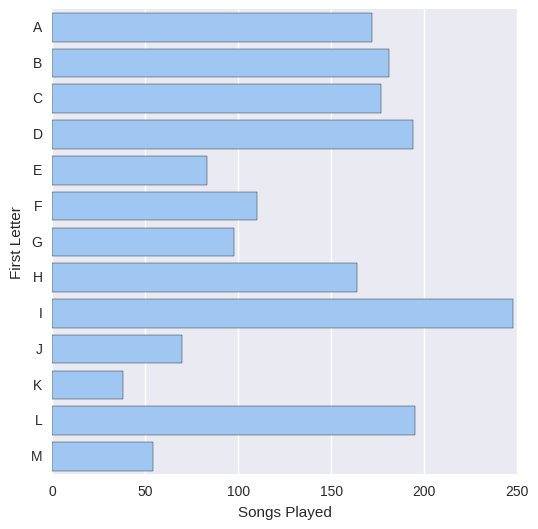

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Letter', data=playlist, color='b')
ax.set(xlabel="Songs Played", ylabel="First Letter")

In [4]:
c = playlist['Letter'].value_counts()
letters = pd.DataFrame(zip(c.keys().tolist(), c.tolist()), columns=('Letter', 'Count'))
letters_csv = path.join(data_dir, '80s_letters.csv')
letters.to_csv(letters_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (letters_csv, path.basename(letters_csv)))


### Songs by Year

Given the decade orientation this time,
it makes sense to break the songs down by year.

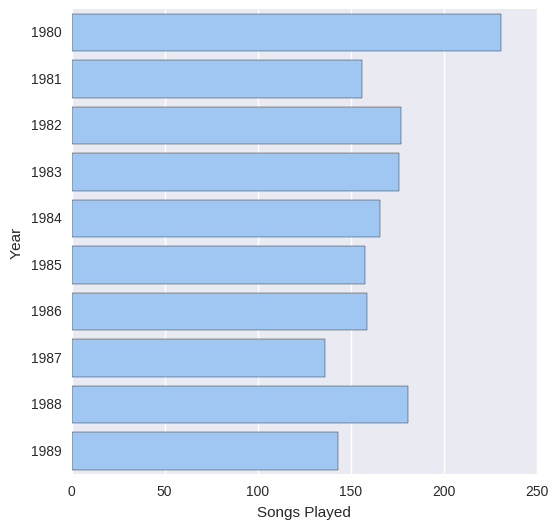

In [5]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.countplot(y='Year', data=playlist[playlist['Year'] > 0], color='b')
ax.set(xlabel="Songs Played", ylabel="Year")

In [6]:
c = playlist['Year'].value_counts()
years = pd.DataFrame(zip(c.keys().tolist(), c.tolist()), columns=('Year', 'Count'))
years = years[years['Year'] > 0]
years_csv = path.join(data_dir, '80s_years.csv')
years.to_csv(years_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (years_csv, path.basename(years_csv)))

### Most Popular Artists

The origional playlist was dominated by the Beatles.
The 70s list was a bit more even,
and it was kind of fun to watch the lead change over time.
We'll see how the 90's goes,
but so far ...

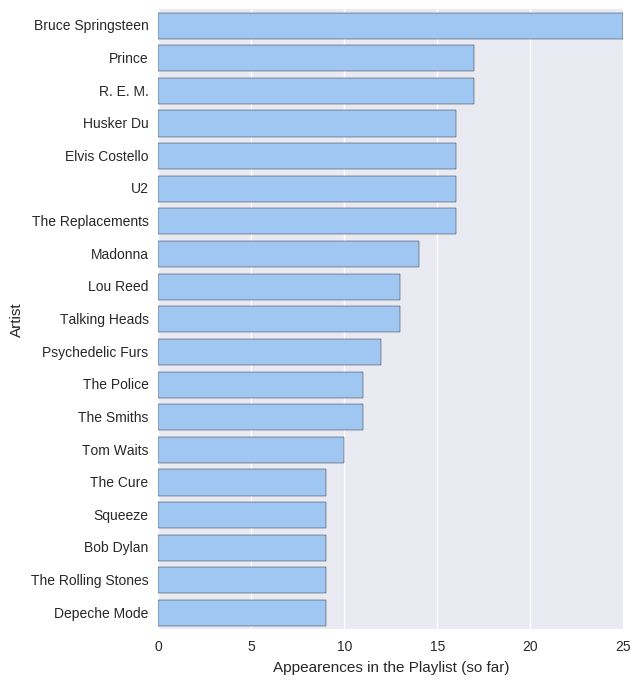

In [7]:
c = playlist['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'Count'))
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='Count', data=artists[artists['Count'] > 8], color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

In [8]:
artists_csv = path.join(data_dir, '80s_artists.csv')
artists.to_csv(artists_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (artists_csv, path.basename(artists_csv)))


### Artists Who Have Played For The Most Time

This isn't overly accurate, as it is based on the sucessive start times
in the playlist, and those only have one minute granularity.
Plus the hosts do pause to talk every few songs,
and that isn't factored out.
But it's the best we have.
Besides someone asked about this.
Playing more songs helps with total duration,
but so does long songs.

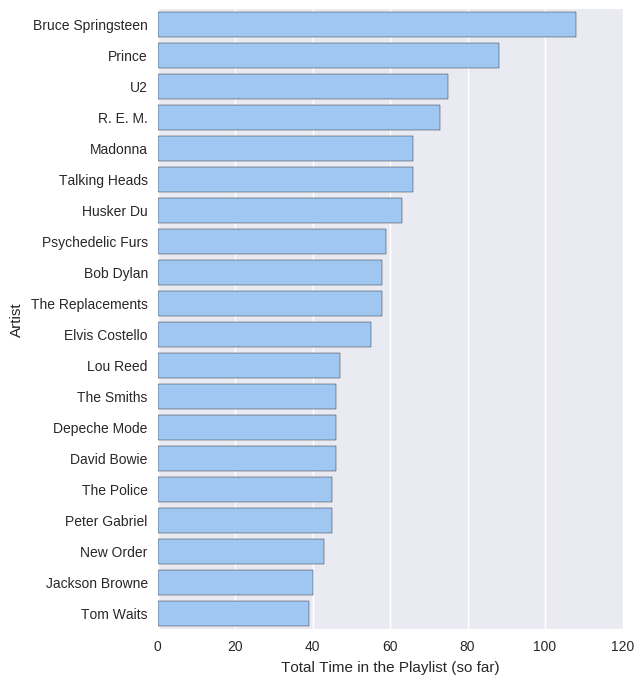

In [9]:
artist_durations = playlist.groupby('Artist')['Duration'].sum().to_frame()
artist_durations = artist_durations.reset_index()
artist_durations = artist_durations.sort_values(by='Duration', ascending=False)

f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='Duration', data=artist_durations.head(20), color='b')
ax.set(xlabel="Total Time in the Playlist (so far)")

In [10]:
artist_durations_csv = path.join(data_dir, '80s_artist_durations.csv')
artist_durations.to_csv(artist_durations_csv, index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (artist_durations_csv, path.basename(artist_durations_csv)))


### Coverage

Has any artist played all the letteres so far?
If not, who came close?
How about all the years?
That takes fewer songs in the countdown,
but places an onus on career longevity.

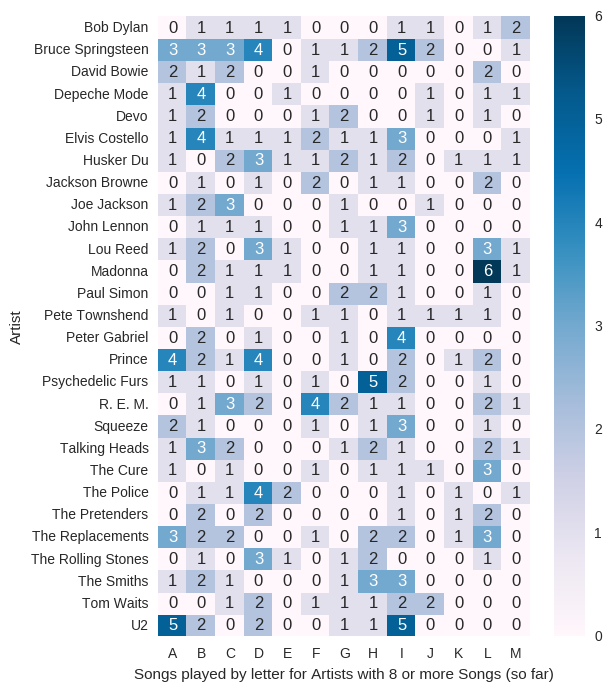

In [11]:
c = playlist[playlist.groupby('Artist')['Artist'].transform('size') >= 8]
c = c.groupby(['Artist', 'Letter']).count()
c.reset_index(level=[0,1], inplace=True)
c = c.pivot('Artist', 'Letter', 'Title').fillna(0)
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
ax = sns.heatmap(c, annot=True, cmap='PuBu')
ax.set(xlabel="Songs played by letter for Artists with 8 or more Songs (so far)")

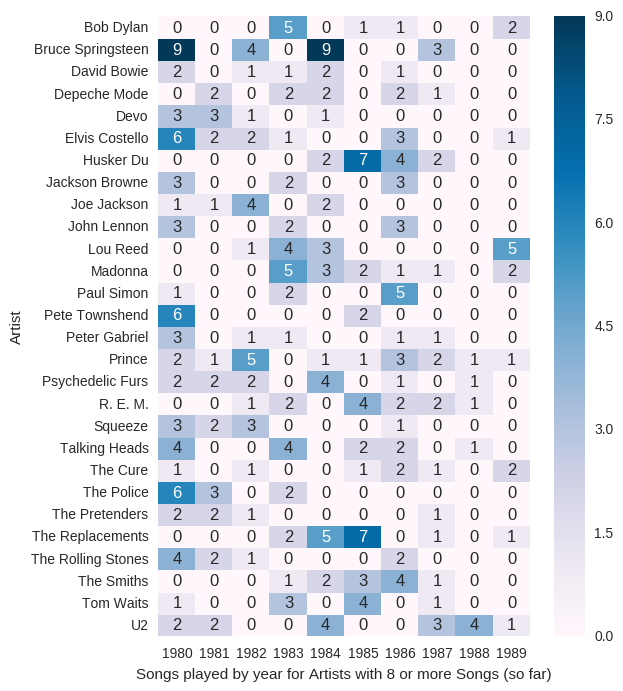

In [12]:
c = playlist[playlist.groupby('Artist')['Artist'].transform('size') >= 8]
c = c[c['Year'] > 0]
c = c.groupby(['Artist', 'Year']).count()
c.reset_index(level=[0,1], inplace=True)
c = c.pivot('Artist', 'Year', 'Title').fillna(0)
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes('pastel')
ax = sns.heatmap(c, annot=True, cmap='PuBu')
ax.set(xlabel="Songs played by year for Artists with 8 or more Songs (so far)")

### First words

Part of what started this last year was looking at first words.
I didn't think that would be interesting,
but when "I" took over the huge run of the letter I,
I figured it was worth watching.

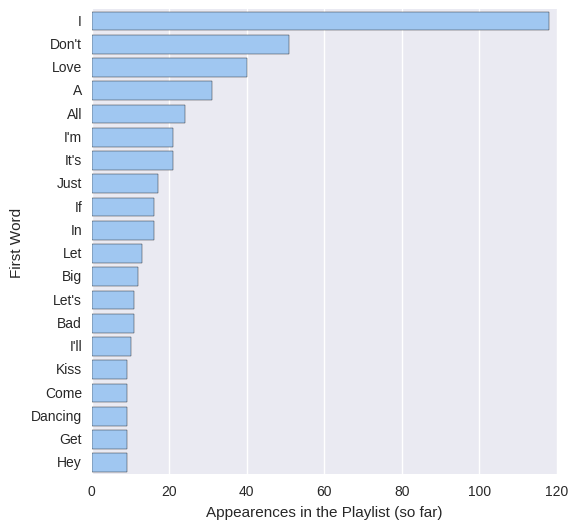

In [13]:
c = playlist['First Word'].value_counts()
words = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('First Word', 'Count'))

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='First Word', x='Count', data=words.head(20), color='b')
ax.set(xlabel="Appearences in the Playlist (so far)")

In [14]:
first_words_csv = path.join(data_dir, '80s_first_words.csv')
words.head(50).to_csv(first_words_csv, columns=['First Word', 'Count'], index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (first_words_csv, path.basename(first_words_csv)))


### Longest Songs

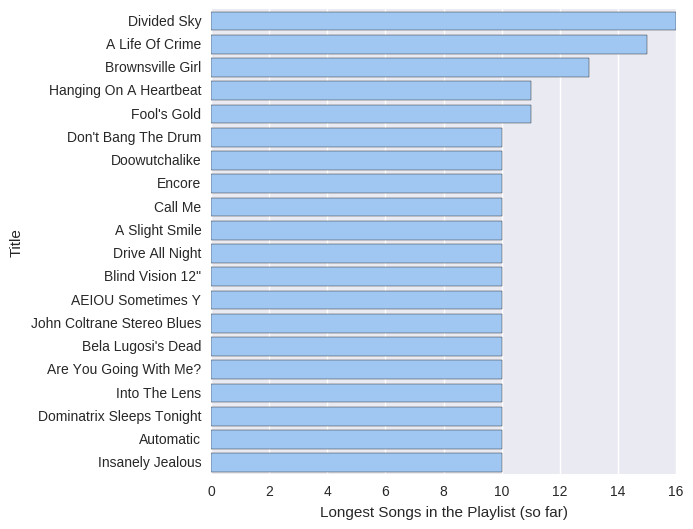

In [15]:
long_songs = playlist.sort_values(by='Duration', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes('pastel')
sns.barplot(y='Title', x='Duration', data=long_songs.head(20), color='b')
ax.set(xlabel="Longest Songs in the Playlist (so far)")

In [16]:
long_songs_csv = path.join(data_dir, '80s_long_songs.csv')
long_songs.head(20).to_csv(long_songs_csv, columns=['Artist', 'Title', 'Duration'], index=False)
HTML('<p>The same data is availiable as <a href="%s">%s</a>.<p>' % (long_songs_csv, path.basename(long_songs_csv)))

### Comparision with other XPN Playlists

#### 885 Best and 88 Worst

Vefore the dawn of A-Z,
XPN did year end countdowns based on listener vote.
In 2014 the main list was the 885 Best Songs of All Time.
It had a parallel mini-list the 88 Worst Songs of All time.

So for eveyone in twitterdom, who is compaining 
"why is *song* or *anything by artist* in this countdown?"
lets's see what the overlap is.

In [17]:
best885_file = path.join(data_dir, '885best.csv')
best885 = pd.read_csv(best885_file)

worst88_file = path.join(data_dir, '88worst.csv')
worst88 = pd.read_csv(worst88_file)

besties = pd.merge(playlist, best885, how='inner', on=['Title', 'Artist'])
besties.to_csv(path.join(data_dir, '80s_and_885Best.csv'), index=False)
horrors = pd.merge(playlist, worst88, how='inner', on=['Title', 'Artist'])
horrors.to_csv(path.join(data_dir, '80s_and_88Worst.csv'), index=False)

s= "<p>Of the %d tracks in the 80s A-Z so far, " + \
    "%d or %0.2f%% where in 2014's 885 best playlist. " + \
    "Those are availiable as <a href='data/80s_and_885Best.csv'>80s_and_885Best.csv</a>. " + \
    "Sadly %d were in 2014's 88 worst playlist. " + \
    "Those are available as <a href='data/80s_and_88Worst.csv'>80s_and_88Worst.csv</a>.</p>"
HTML(s %(len(playlist), len(besties), float(len(besties) * 100) / float(len(playlist)),
         len(horrors)))

So what were the songs that were part of 88Worst?

In [18]:
HTML(horrors.to_html(index=False, columns=['Title', 'Artist']))

Title,Artist
Come On Eileen,Dexy's Midnight Runners
Don't Stop Believin',Journey
Livin' On A Prayer,Bon Jovi


#### Previous A-Z Countdowns

Last year there was a 70's A-Z Countdown,
and in 2016 there was the origional generic A-Z Countdown.
We can compare the current playlist to them.

In [19]:
originals_file = path.join(data_dir, 'A2Z.csv')
originals = pd.read_csv(originals_file)

seventies_file = path.join(data_dir, '70sA2Z.csv')
seventies = pd.read_csv(seventies_file)

reruns = pd.merge(playlist, originals, how = 'inner', on = ['Title', 'Artist'])
reruns_file = path.join(data_dir, '80s_reruns.csv')
reruns.to_csv(reruns_file, index=False, encoding='utf-8')

s = """
    <p>Of the %d tracks played so far, %d tracks or %0.2f%%
    were played as part of the origional play list.
    The list is in <a href='%s'>%s</a></p>.
"""

HTML(s % (len(playlist), len(reruns), float(len(reruns) * 100)/float(len(playlist)),
         reruns_file, path.basename(reruns_file)))

### Duplicate Titles

Duplicate titles are not necessarily covers.
Many are.  Other times it is case of "same title, different song."
There have been a lot of 2 songs same title,
but only a few with more than two songs.

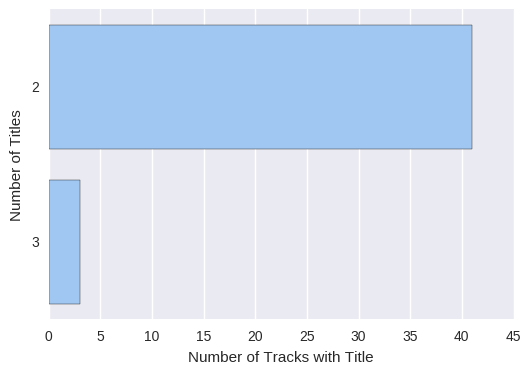

In [23]:
c = playlist['Title'].value_counts()
title_counts = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                           columns=('Title', 'Count'))
f, ax = plt.subplots(figsize=(6, 4))
sns.set_color_codes('pastel')
sns.countplot(y='Count', data=title_counts[title_counts['Count'] > 1], color='b')
ax.set(xlabel="Number of Tracks with Title", ylabel="Number of Titles")

In [24]:


HTML(title_counts[title_counts['Count'] > 2].sort_values(by='Title').to_html(index=False))

Title,Count
Desire,3
Heartbeat,3
Magic,3


## Availability

The code for this project is in [my git hub repo](https://github.com/asudell/a2z).
The notebook its self is [published on nbviewer](http://nbviewer.jupyter.org/github/asudell/a2z/blob/master/80sAtoZ.ipynb)

## License

This project is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).
You are free to use for commercial or non-commercial purposes,
so long as you attribute the source and also allow sharing.